# Graded Challenge 3

## Content
You'll find most useful data for project analysis. Columns are self explanatory except:

- Usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).

- Usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).

- Usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

## Importing Library 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [35]:
df = pd.read_csv('ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Data Cleaning

In [37]:
df.isnull().values.any()

True

In [38]:
num_vars = df.columns[df.dtypes!='object']
cat_vars = df.columns[df.dtypes=='object']

print(num_vars)
print(cat_vars)

Index(['ID', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')
Index(['name', 'category', 'main_category', 'currency', 'deadline', 'launched',
       'state', 'country'],
      dtype='object')


In [39]:
df[num_vars].isnull().sum()

ID                     0
goal                   0
pledged                0
backers                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [40]:
df[num_vars].isnull().sum().sort_values(ascending=False)/len(df)

usd pledged         0.010027
ID                  0.000000
goal                0.000000
pledged             0.000000
backers             0.000000
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

In [41]:
df[cat_vars].isnull().sum()

name             4
category         0
main_category    0
currency         0
deadline         0
launched         0
state            0
country          0
dtype: int64

In [42]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

name             0.000011
category         0.000000
main_category    0.000000
currency         0.000000
deadline         0.000000
launched         0.000000
state            0.000000
country          0.000000
dtype: float64

In [43]:
cleaned_df = df.dropna()
cleaned_df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Because there is only a little amount of data that are counted as missing values, and it is more safe to remove them instead of making the research became more unbiased and this was makes the results become more reliable

In [44]:
cleaned_df.isnull().values.any()

False

In [45]:
cleaned_df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,1.074652e+09,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,6.191368e+08,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380633e+08,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075289e+09,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.610137e+09,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Measure of Central Tendency

In [52]:
central_tendency = ['goal','pledged','backers','usd pledged','usd_pledged_real','usd_goal_real']

for i in central_tendency:
    print ('Mean ' + cleaned_df[i].name+' is '+str(cleaned_df[i].mean()))
    
print('-')

for i in central_tendency:
    print ('Median ' + cleaned_df[i].name+' is '+str(cleaned_df[i].median()))
    
print('-')    

for i in central_tendency:
    print ('Mode ' + cleaned_df[i].name+' is '+str(cleaned_df[i].mode()[0]))

Mean goal is 49522.988841087354
Mean pledged is 9750.538300832606
Mean backers is 106.68836632342742
Mean usd pledged is 7036.802252334279
Mean usd_pledged_real is 9120.898548951884
Mean usd_goal_real is 45863.02597164278
-
Median goal is 5500.0
Median pledged is 620.0
Median backers is 12.0
Median usd pledged is 394.765
Median usd_pledged_real is 624.495
Median usd_goal_real is 5500.0
-
Mode goal is 5000.0
Mode pledged is 0.0
Mode backers is 0
Mode usd pledged is 0.0
Mode usd_pledged_real is 0.0
Mode usd_goal_real is 5000.0


## Measure of Variance

In [55]:
central_tendency = ['goal','pledged','backers','usd pledged','usd_pledged_real','usd_goal_real']

for i in central_tendency:
    print ('Standard Derivation ' + cleaned_df[i].name+' is '+str(cleaned_df[i].std()))
      
print('-')    

for i in central_tendency:
    print ('Variance ' + cleaned_df[i].name+' is '+ str(cleaned_df[i].var()))

print('-')    

for i in central_tendency:
    print ('Range ' + cleaned_df[i].name +' is '+ str(cleaned_df[i].max() - cleaned_df[i].min()))

Standard Derivation goal is 1189361.6012197325
Standard Derivation pledged is 96010.93750563789
Standard Derivation backers is 911.7101242076337
Standard Derivation usd pledged is 78640.16166702054
Standard Derivation usd_pledged_real is 91319.69443054879
Standard Derivation usd_goal_real is 1158767.3727344463
-
Variance goal is 1414581018455.966
Variance pledged is 9218100120.711504
Variance backers is 831215.3505826988
Variance usd pledged is 6184275027.015127
Variance usd_pledged_real is 8339286590.888803
Variance usd_goal_real is 1342741824113.8914
-
Range goal is 99999999.99
Range pledged is 20338986.27
Range backers is 219382
Range usd pledged is 20338986.27
Range usd_pledged_real is 20338986.27
Range usd_goal_real is 166361390.70000002


In [57]:
state_df = df['state'].value_counts()
state_df

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

<AxesSubplot:>

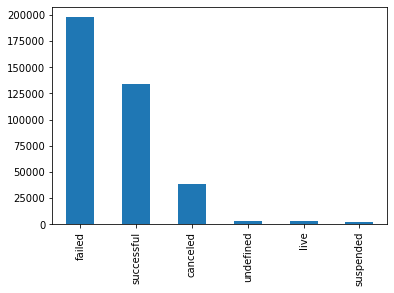

In [60]:
state_df.plot.bar()

In [61]:
currency_df = df['currency'].value_counts()
currency_df

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

<AxesSubplot:>

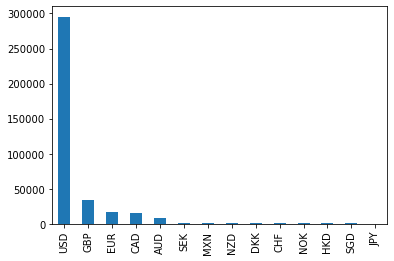

In [62]:
currency_df.plot.bar()

it can be seen that USD has the most have kickstarter campaign in the whole data so that means country that use USD has the most amount of kickstarter campaign

In [74]:
country_df = df['country'].value_counts()
country_df

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

<AxesSubplot:>

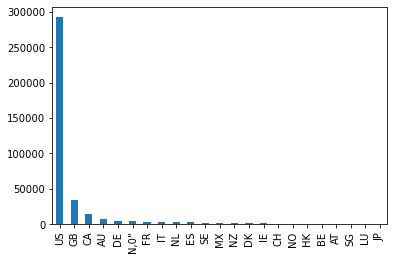

In [75]:
country_df.plot.bar()

As I stated above, USD has the highest amount that means country that uses USD for example US.

In [69]:
categories_df = df['main_category'].value_counts()
categories_df

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

<AxesSubplot:>

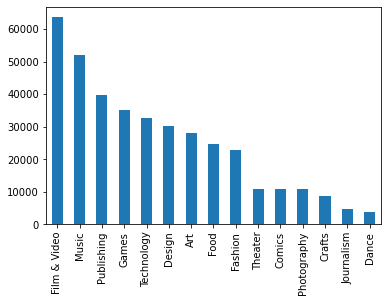

In [70]:
categories_df.plot.bar()

it can be seen that Film & video have kickstarter campaign in the whole data

In [ ]:
cleaned_df.grouby([])

Goal sample mean:45863.02597164278
Pledged sample mean:9120.898548951884
t-statistic:19.361880460297776
p-value:0.000000


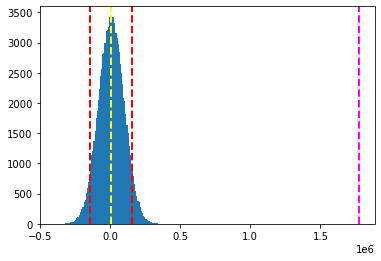

In [73]:
np.random.seed(123)
pledged = cleaned_df['usd_pledged_real']
goal = cleaned_df['usd_goal_real']
print('Goal sample mean:'+str(goal.mean()))
print('Pledged sample mean:'+str(pledged.mean()))

t,p = stats.ttest_rel(goal, pledged)
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(pledged.mean(), pledged.std(), 100000)
ci = stats.norm.interval(0.90, pledged.mean(), pledged.std())
plt.hist(pop, bins=100)
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

Hipotesis testing between pledge real and goal real, there is no connection between them. Because the value of p-value is equals to zero.